# Домашнее задание

Логирование данных с помощью Comet.ml

In [23]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment

In [24]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key='dTDoVK0JYU3A5lKeYmDeo2GTn',
    project_name='medical',
    workspace='olesyanori',
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/olesyanori/medical/9328103d1d75485aae5f9092e63a2611
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (132.90 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COM

# Загрузка данных

In [25]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [26]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=686bf2127cf240c0b84806aeb9264d7b&experimentKey=ffce5c2ef8624465b23bfca4ae8798c7',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=686bf2127cf240c0b84806aeb9264d7b&experimentKey=ffce5c2ef8624465b23bfca4ae8798c7',
 'imageId': '686bf2127cf240c0b84806aeb9264d7b'}

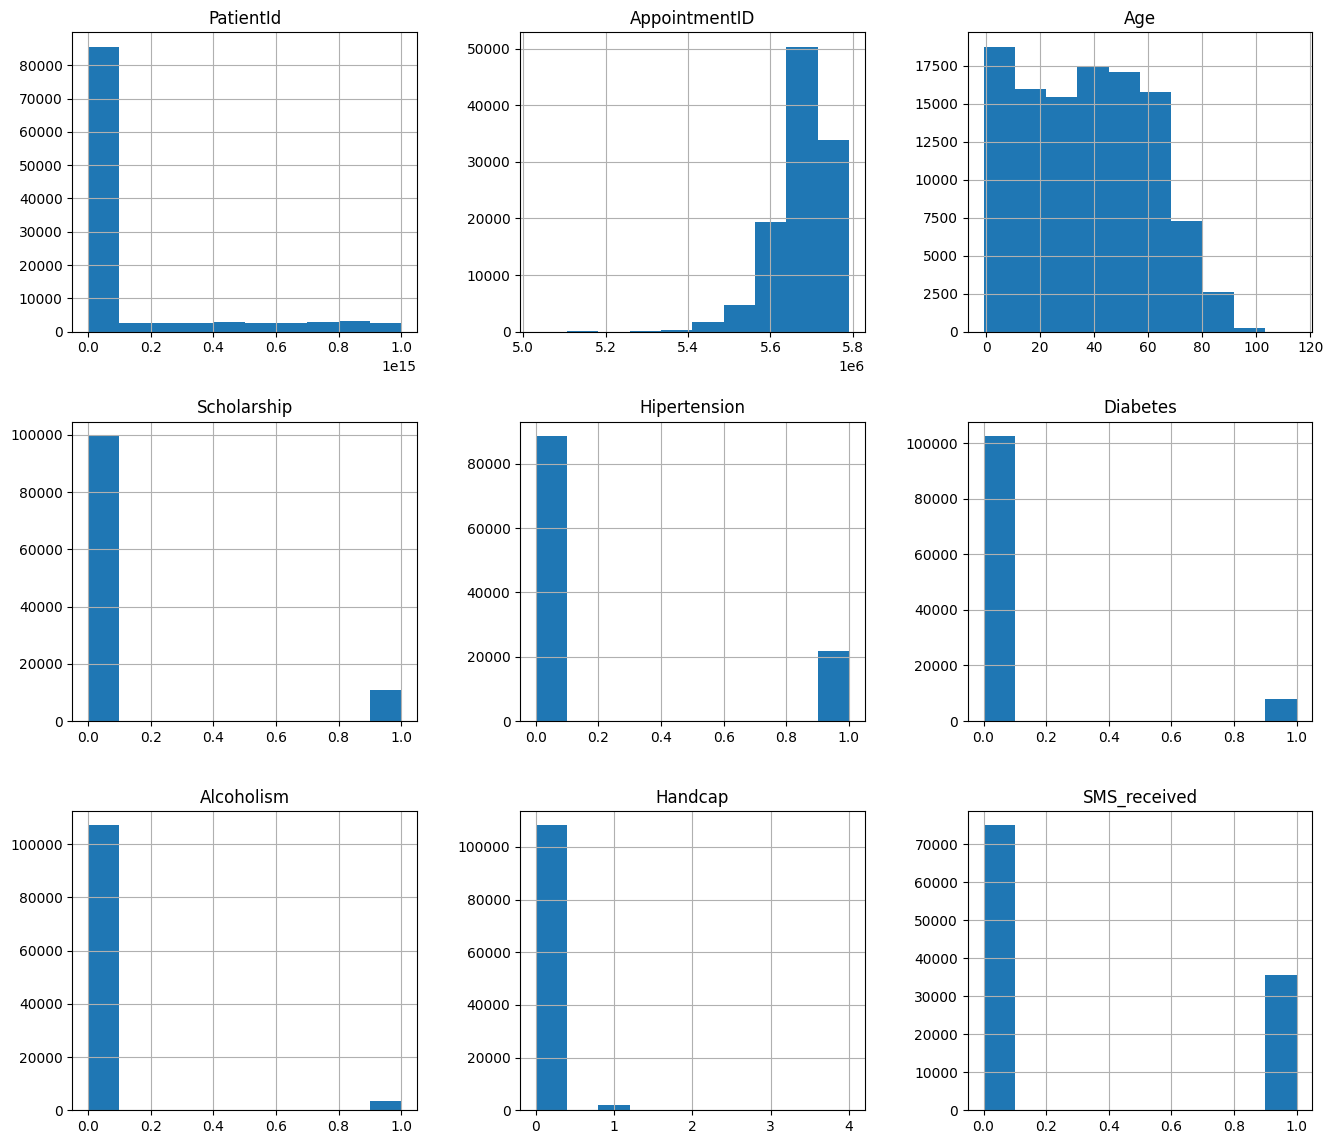

In [27]:
df.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [28]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [29]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

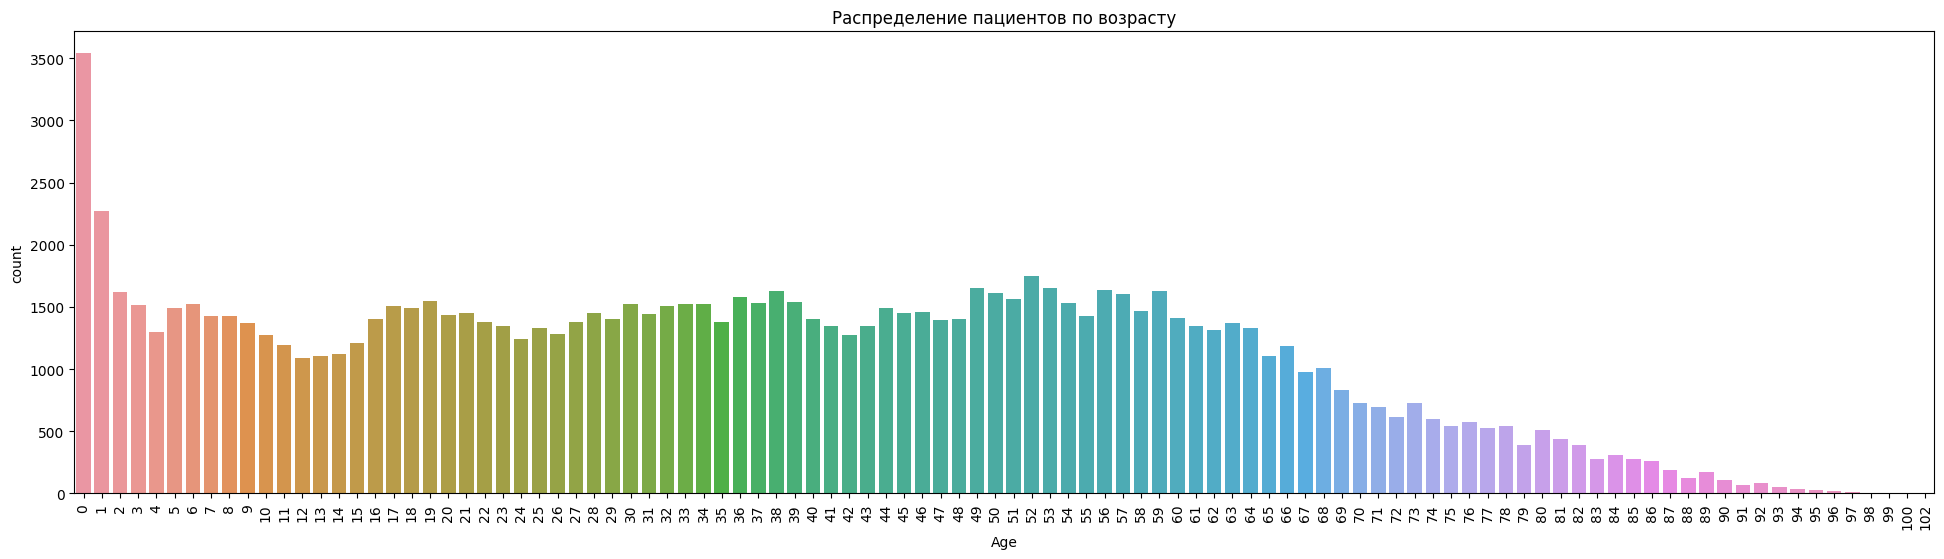

In [30]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

# Придет ли пациент на назначенный приием? 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Анализ корреляции числовых признаков

Так как данные не очищенны рассчитаем корреляцию методом Кендалла

In [32]:
#Определяем числовые признаки для анализа корреляции
numeric_data_columns = ['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
#рассчитываем коэфициент корреляции
corr = df[numeric_data_columns].corr(method='kendall')
display(corr)

c:\Users\LesenaM\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.074029,0.413550,0.241074,0.084055,0.064490,0.012656
Scholarship,-0.074029,1.000000,-0.019731,-0.024899,0.035019,-0.009013,0.001188
Hipertension,0.413550,-0.019731,1.000000,0.433096,0.087972,0.084978,-0.006309
Diabetes,0.241074,-0.024899,0.433096,1.000000,0.018471,0.059252,-0.014555
Alcoholism,0.084055,0.035019,0.087972,0.018471,1.000000,0.003746,-0.026151
Handcap,0.064490,-0.009013,0.084978,0.059252,0.003746,1.000000,-0.025049
SMS_received,0.012656,0.001188,-0.006309,-0.014555,-0.026151,-0.025049,1.000000


{'web': 'https://www.comet.com/api/image/download?imageId=50474fa94a644d0d9e1d2562a1b099a0&experimentKey=ffce5c2ef8624465b23bfca4ae8798c7',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=50474fa94a644d0d9e1d2562a1b099a0&experimentKey=ffce5c2ef8624465b23bfca4ae8798c7',
 'imageId': '50474fa94a644d0d9e1d2562a1b099a0'}

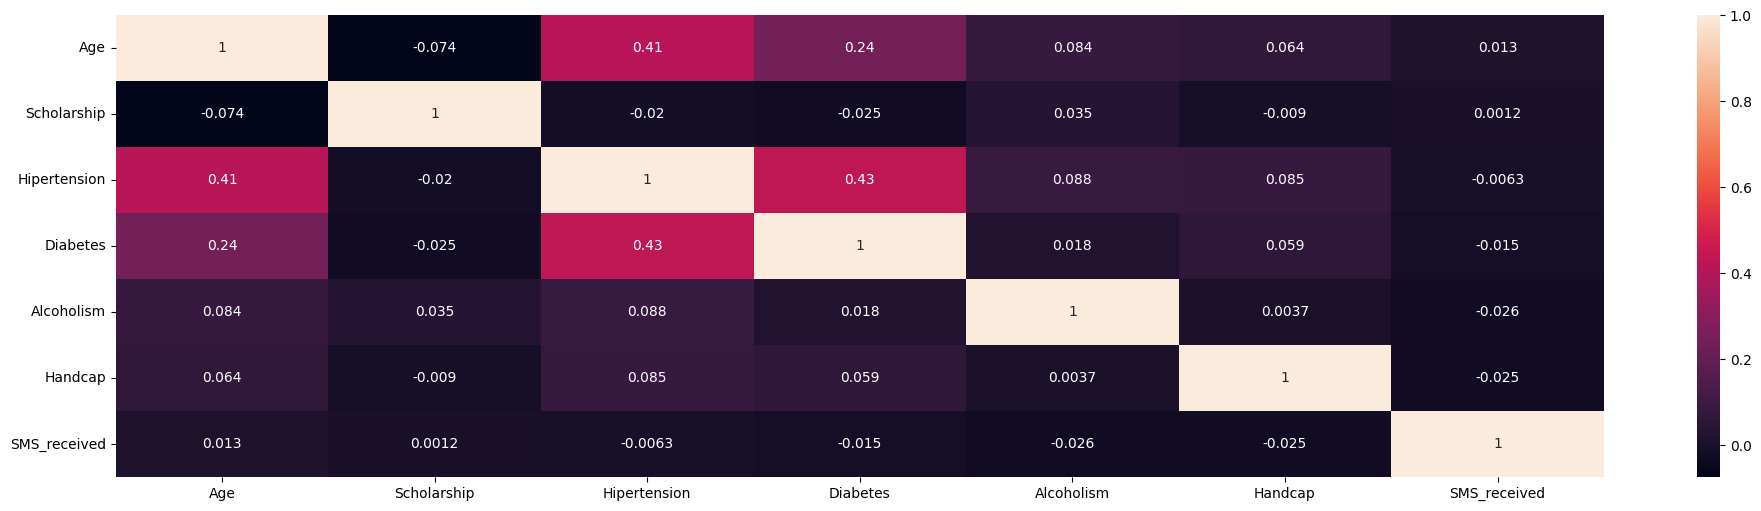

In [33]:
plt.figure(figsize=(24,6))
plt.xticks()
sns.heatmap(corr, annot = True)
experiment.log_figure(figure=plt)

In [34]:
experiment.display()

In [35]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/olesyanori/medical/ffce5c2ef8624465b23bfca4ae8798c7
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 3
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (132.90 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish uploading